In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
data.shape

(114000, 21)

In [5]:
data.drop(data.columns[0], axis=1, inplace=True)
data.shape

(114000, 20)

In [6]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Here our target variable is the popularity. Lets check its range

In [8]:
data.popularity.min()

0

In [9]:
data.popularity.max()

100

**Data Analysis**

In EDA, we always compare with the dependent variable, here Popularity.So we see the relationships of different features with this variable.

1. Missing Values
2. Duplicate values
3. All the numerical values
4. Distribution of the numerical values. Check the skewness of the features
5. Categorical variables
6. Cardinality of Categorical variables
7. Outliers
8. Relationship between independent and dependent features

**1.Missing Values**

In [10]:
features_with_nan = [feature for feature in data.columns if data[feature].isna().sum()>0]
features_with_nan

['artists', 'album_name', 'track_name']

In [11]:
for feature in features_with_nan:
    print('Number of missing value in {}: {}'.format(feature, np.round(data[feature].isna().sum())))

Number of missing value in artists: 1
Number of missing value in album_name: 1
Number of missing value in track_name: 1


We see that the number of missing values is just 1 in each of the columns. So we can drop these nan values since the number is very less as compared to total number of entries

In [12]:
data= data.dropna()

In [13]:
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

**2.Dropping the duplicates**

In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(113549, 20)

**3. Numerical features**

In [16]:
feature_numerical = [feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


*Selecting the discrete features among the numerical features and finding their relationship with popularity*

In [17]:
feature_discrete_numerical = [feature for feature in feature_numerical if data[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

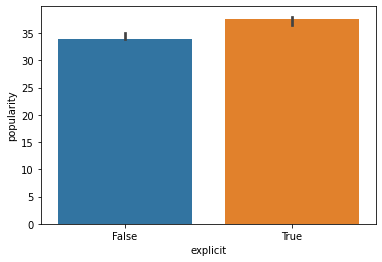

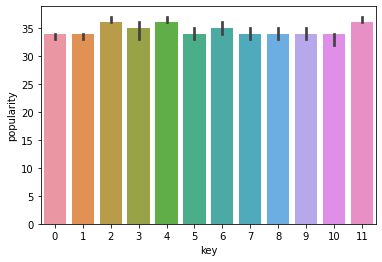

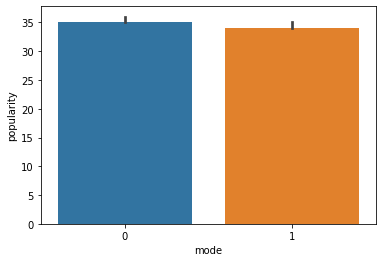

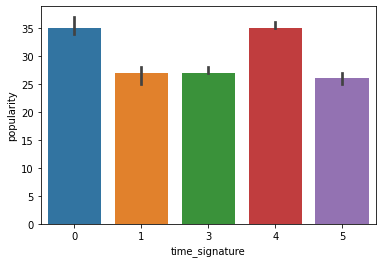

In [18]:
for feature in feature_discrete_numerical:
    dataset = data.copy()
    sns.barplot(x=feature,y=dataset['popularity'], data=dataset, estimator =np.median)
    plt.show()

**Observarion**

1. We see that songs which contain explicit lyrics are more popular in comparison with songs that do not contain such lyrics
2. The popularity of songs or tracks in different keys do not affect their popularity much. Songs in all keys are almost equally popular
3. The tracks in both the modes are equally popular, the major as well as the minor
4. The time signature (meter) is a notational convention to specify how many beats are in each bar. The time_signature should lie between 3 to 7 as per the data dictionary time signature of 3/4, to 7/4. But here time_signature ranges from 0 to 5. We would probably convert these feature selection. From the current looks, tracks having time_signature 0 and 4 are more popular than others.

*Selecting the continuous features among the numerical features and finding their distribution*

In [19]:
features_continuous_numerical = [features for features in feature_numerical if features not in feature_discrete_numerical]
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [20]:
from scipy.stats import skew

popularity skewness is: 0.04222809948109981


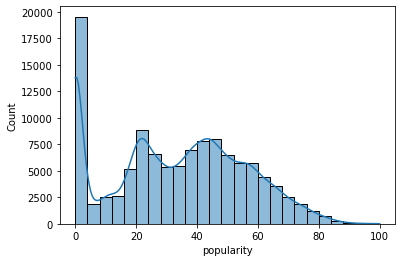

duration_ms skewness is: 10.814434004933338


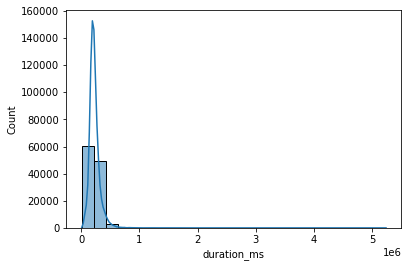

danceability skewness is: -0.40039912956007156


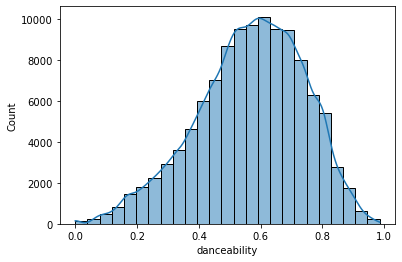

energy skewness is: -0.5985421824281578


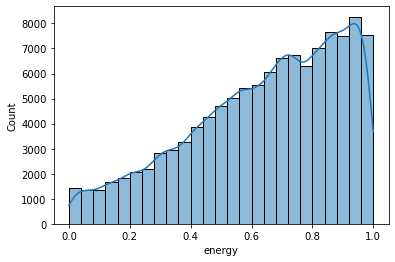

loudness skewness is: -2.0133133823721505


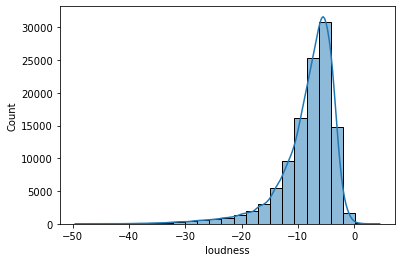

speechiness skewness is: 4.644508700286168


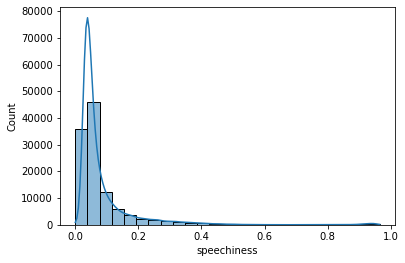

acousticness skewness is: 0.7302103030827027


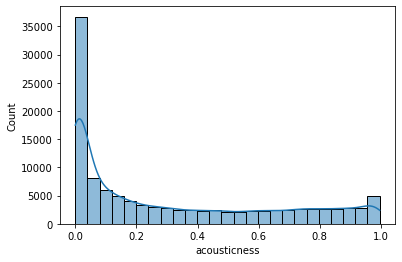

instrumentalness skewness is: 1.7377466866935407


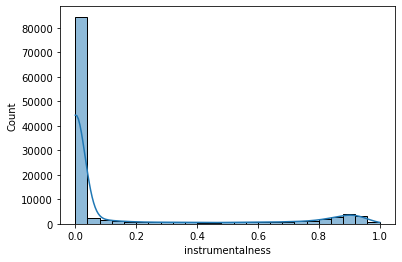

liveness skewness is: 2.1054497237799685


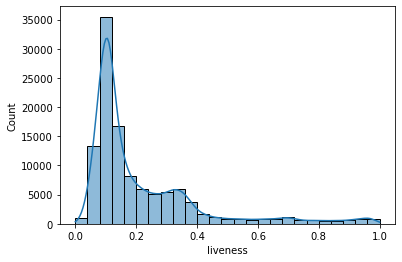

valence skewness is: 0.11477275798096234


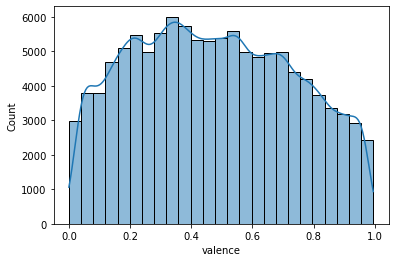

tempo skewness is: 0.23160111991386947


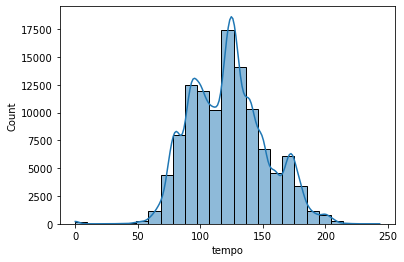

In [21]:
for feature in features_continuous_numerical:
    dataset = data.copy()
    print(feature, 'skewness is:', skew(dataset[feature]))
    sns.histplot(x=feature,data=dataset, bins=25, kde=True)
    plt.show()

**Observation**

1. We see that danceability, valence and tempo are almost normal distribution
2. Loudness is left skewed
3. Rest all are right skewed

Now to remove the skewness, we can perform operations like log transformation, square-root transformation etc. But before applying any of the methdos, lets check the correlation of the continuous features with the target

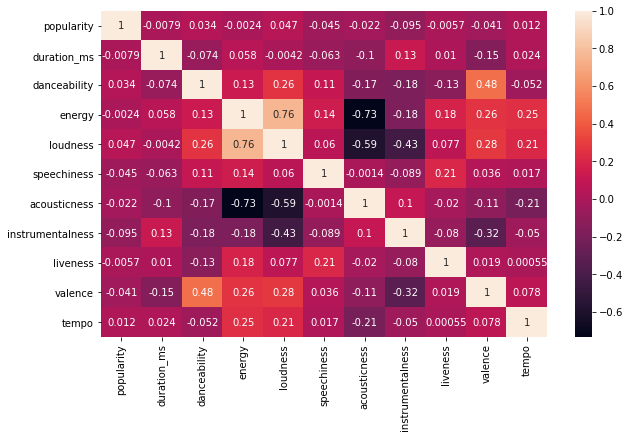

In [22]:
dataset= data.copy()
plt.figure(figsize=(10,6))
sns.heatmap(data[features_continuous_numerical].corr(),annot=True)
plt.show()

We see that none of the continuous features has a great correlation with the target variable popularity. SO we can perform the trasnformations if we opt for regression model. The other models like SVM, Tree based methods, XG boost do not require such transformations. We would deal with the transformations in feature engineering

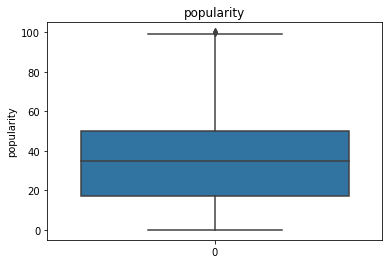

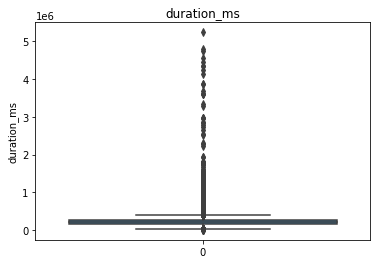

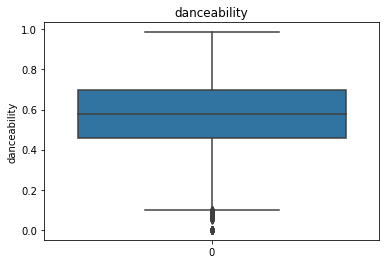

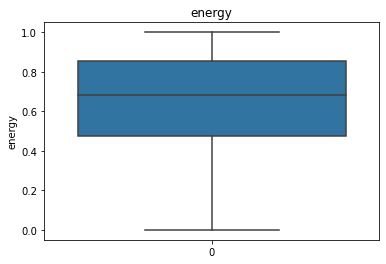

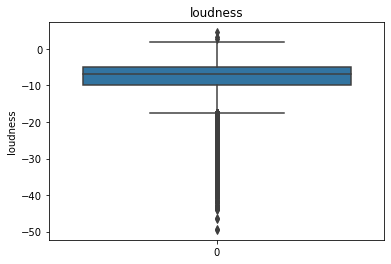

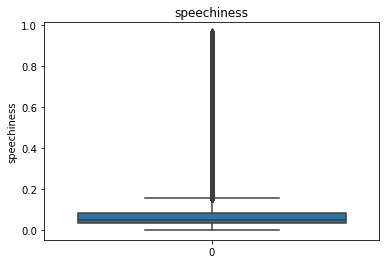

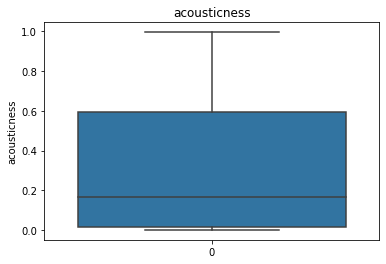

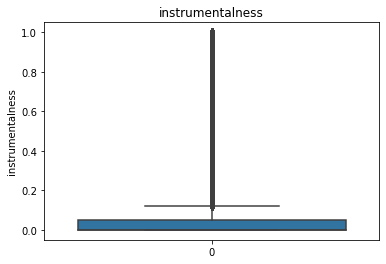

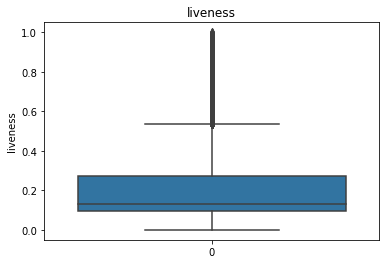

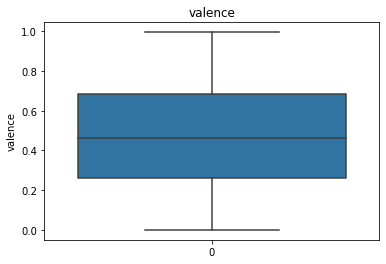

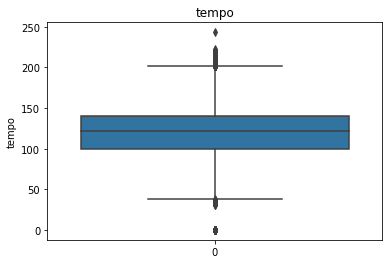

In [23]:
#checking the outliers
for feature in features_continuous_numerical:
    dataset = data.copy()
    sns.boxplot(data=dataset[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We see that apart from energy, acousticness and valence, there are lot of outliers in most of the features

In [24]:
feature_categorical = [feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical variables:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical variables: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [25]:
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Among the categorical features, track_id would be unique for each entry. Later we can drop this column. Lets check the cardinality of the ctageircal features to know the number of unique variables

In [26]:
for feature in feature_categorical:
    dataset=data.copy()
    print(feature, ':Number of unique entries:', dataset[feature].nunique())

track_id :Number of unique entries: 89740
artists :Number of unique entries: 31437
album_name :Number of unique entries: 46589
track_name :Number of unique entries: 73608
track_genre :Number of unique entries: 114


**Observation:** There are a lot of unqiue entries in each of the categorical features

Most of the categorical features are names like track name, album name, artist name, etc. track_id is unique for every song/track. We can later drop this. track_genre can have effect in popularity.

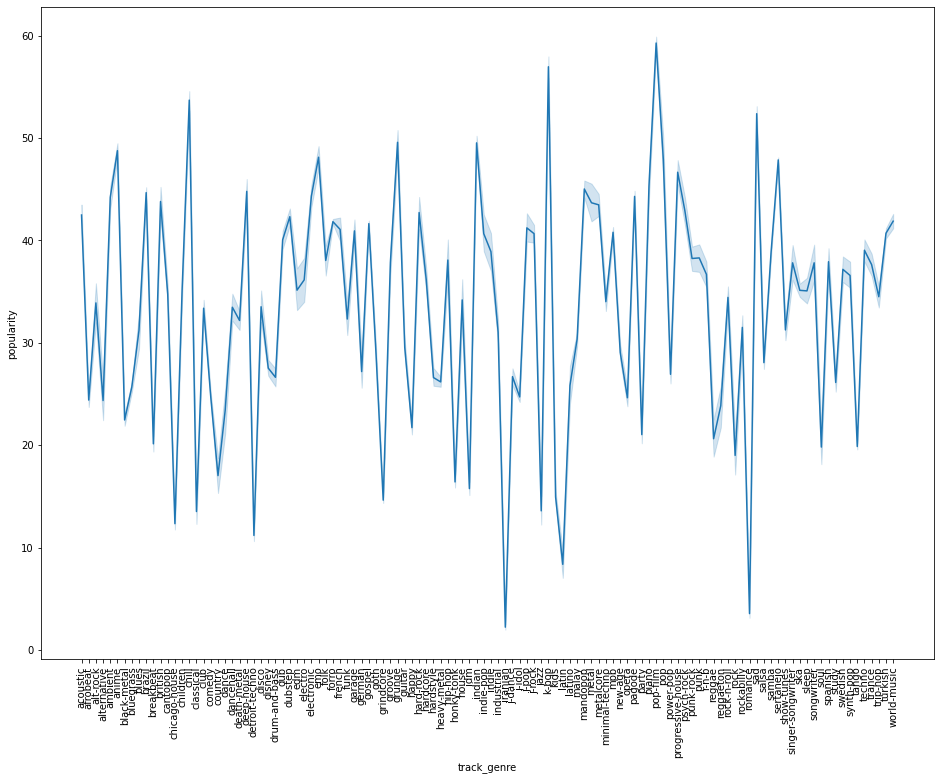

In [27]:
dataset = data.copy()
plt.figure(figsize=(16,12))
sns.lineplot(x='track_genre', y='popularity', data=dataset)
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In feature engineering, we would perform the following steps:

1. Convert the speechiness column to represent the presence of spoken words in a track
2. Remove the skewness of the data for continous numerical features for prediction using regression algorithm
3. Encoding the categorical variables
4. Standardize the values of the variables to the same range

**Working on the speechiness column.**

From the data description, the speechiness column detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

So we can convert this column to discrete features. High, medium and low speechiness based on the range.

- High for Values above 0.66
- Medium for Values between 0.33 and 0.66
- Low for values below 0.33

In [28]:
data['speechiness'].sort_values()

101681    0.000
98779     0.000
101663    0.000
101666    0.000
101667    0.000
          ...  
18227     0.962
18432     0.962
18530     0.963
18504     0.963
18152     0.965
Name: speechiness, Length: 113549, dtype: float64

Now, we would make a new column for the speechiness which wouuld depict whether the track has high, low or medium speechiness.

In [29]:
speechiness_type = []
for i in data.speechiness:
    if i < 0.33:
        speechiness_type.append('Low')
    elif  0.33 <= i <= 0.66:
        speechiness_type.append('Medium')
    else:
        speechiness_type.append('High')

In [30]:
data['speechiness_type'] = speechiness_type
print(data.speechiness_type.value_counts())
data.head()

Low       109947
Medium      2726
High         876
Name: speechiness_type, dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Low


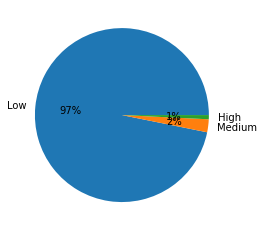

In [31]:
plt.pie(x=data['speechiness_type'].value_counts(),labels=data['speechiness_type'].unique(), autopct='%.0f%%')
plt.show()

So, 97% of tracks have low speechiness. Which means that most of the tracks are melodies rather than raps

***Lets check the relationship of the speechisess type with popularity.***

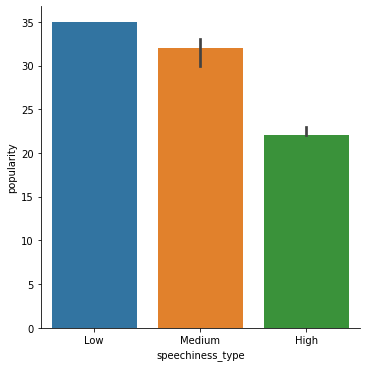

In [32]:
sns.catplot(data=data,x='speechiness_type',y='popularity', kind='bar',estimator=np.median)
plt.show()

The median popularity of the tracks with low speechiness is high. It shows that people like more melodious songs as compared to rap songs.

In [33]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Low


**Skewness**

For regression models, we have to deal with the skewness of the continuous data. If the data is skewed, the regression models would not give good results for prediction.But for other models like decission tree, random forest etc. we do not need to modify the skewness. In this dataset, we saw that most of the continuous columns are skewed. We have to modify them for regression models. From EDA we had found that the continuous features did not have a great correlation with the target variable popularity. So we can reduce their skewness and see the results.

Transforming the features to gaussian distribution for regression models.

In [34]:
data.drop(data.columns[0], axis = 1, inplace = True)

In [35]:
#Selecting the numerical features:
feature_numerical=[feature for feature in data.columns if data[feature].dtypes!='O']

In [36]:
#Selecting the discrete numerical features
feature_discrete_numerical = [ feature for feature in feature_numerical if data[feature].nunique()<50]

In [37]:
#Selecting the continuous features
feature_continuous_numerical = [feature for feature in feature_numerical if feature not in feature_discrete_numerical]
feature_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [38]:
data.shape

(113549, 20)

In [39]:
dataset_log = data.copy()
dataset_reci = data.copy()
dataset_sqrt = data.copy()
dataset_expo = data.copy()

In [40]:
from scipy import stats

In [41]:
for feature in feature_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)

C:\Users\anish\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


popularity original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766


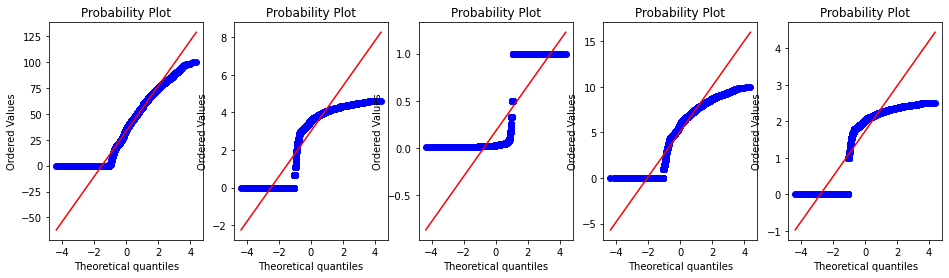

duration_ms original skewness: 10.814434004933338
logarithmic: -0.31958068443270016
reciprocal:  5.062710652230053
square-root: 1.7918392897162523
exponential: 0.3280005714079256


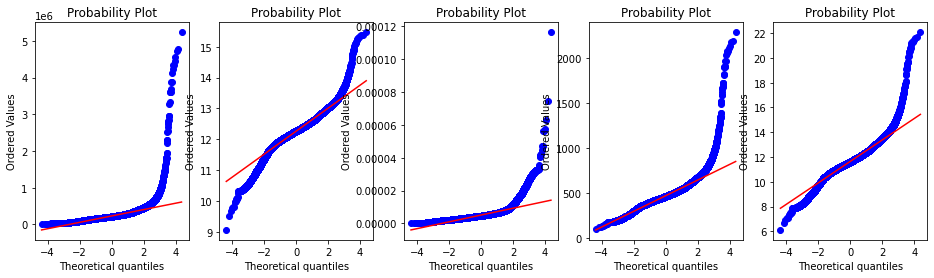

danceability original skewness: -0.40039912956007156
logarithmic: -0.7033043814280044
reciprocal:  1.0423257462450113
square-root: -1.0782094247967113
exponential: -3.4689794311862756


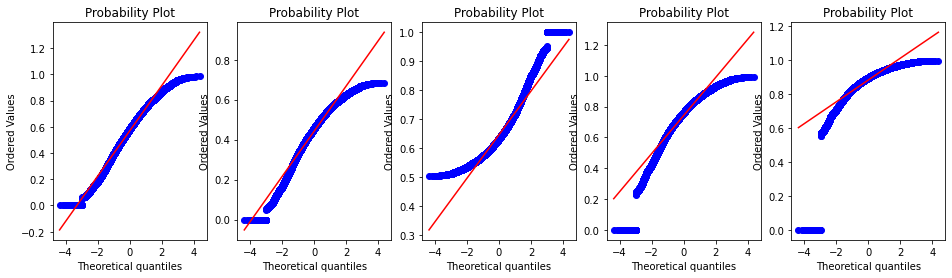

energy original skewness: -0.5985421824281578
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462219
exponential: -2.2008891779513866


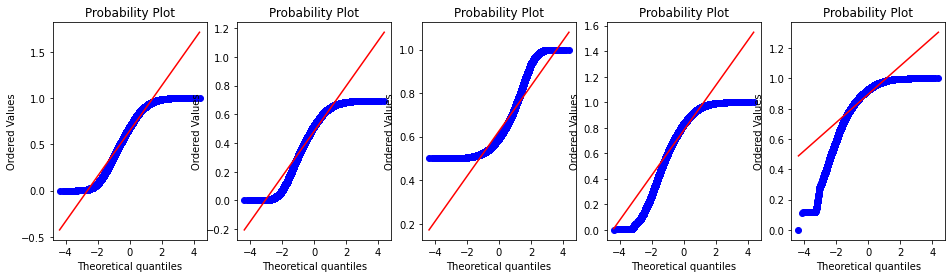

loudness original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.34170099509375
square-root: nan
exponential: nan


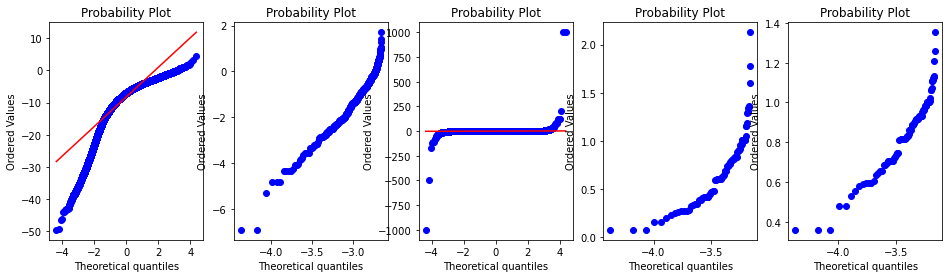

speechiness original skewness: 4.644508700286168
logarithmic: 3.7094268216147404
reciprocal:  -3.0189124109405174
square-root: 2.5106804244132297
exponential: 1.2585346167026825


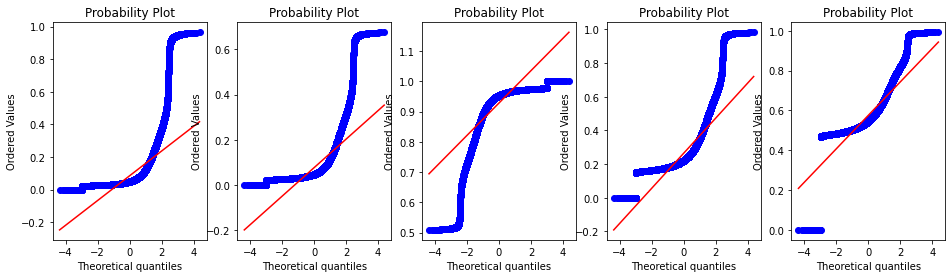

acousticness original skewness: 0.7302103030827027
logarithmic: 0.5532779927877304
reciprocal:  -0.3889970180312753
square-root: 0.19182418700584436
exponential: -0.4569165064419811


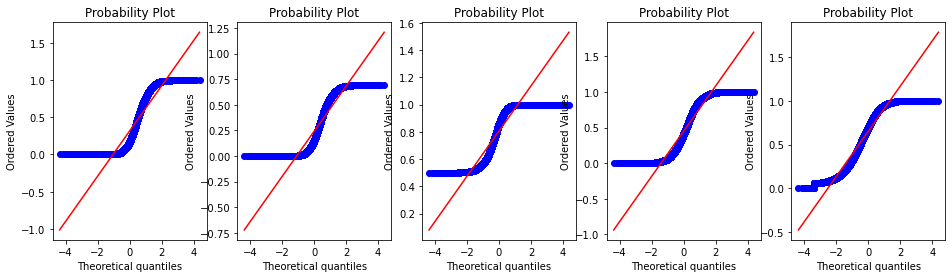

instrumentalness original skewness: 1.7377466866935407
logarithmic: 1.6547543527716166
reciprocal:  -1.578576948759955
square-root: 1.4467885078056792
exponential: 0.929297080678929


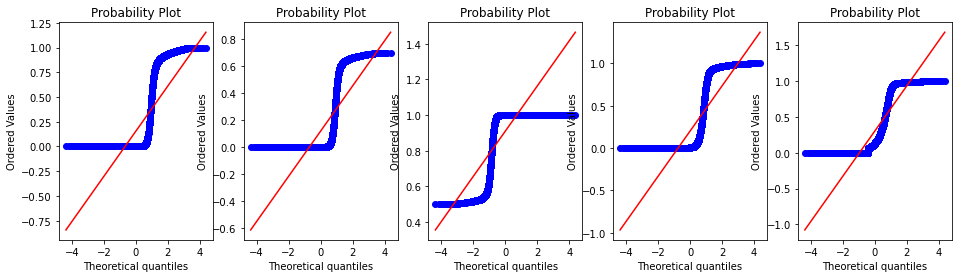

liveness original skewness: 2.1054497237799685
logarithmic: 1.7355487100916003
reciprocal:  -1.409425059871828
square-root: 1.331133238075094
exponential: 0.8567637835174635


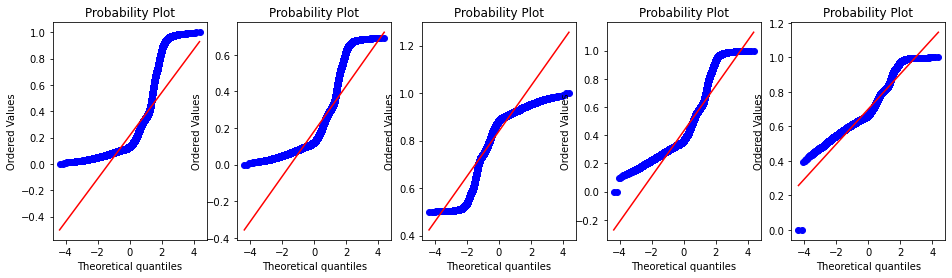

valence original skewness: 0.11477275798096234
logarithmic: -0.14268054744317982
reciprocal:  0.40566649459831083
square-root: -0.4685261380695686
exponential: -1.3963500280712502


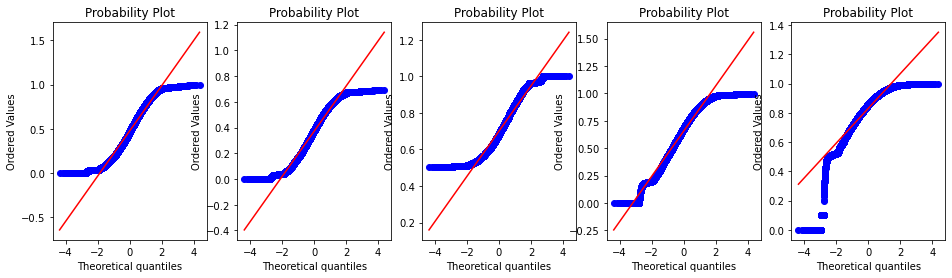

tempo original skewness: 0.23160111991386947
logarithmic: -5.502750438724598
reciprocal:  26.694049451308892
square-root: -0.5935911783686282
exponential: -5.885488448988584


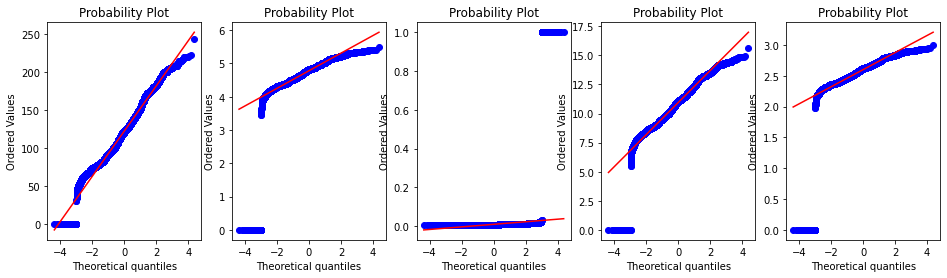

In [42]:
for feature in feature_continuous_numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,5,1)
    print(feature, 'original skewness:', skew(data[feature]))
    stats.probplot(data[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,2)
    print('logarithmic:', skew(dataset_log[feature]))
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,3)
    print('reciprocal: ', skew(dataset_reci[feature]))
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,4)
    print('square-root:', skew(dataset_sqrt[feature]))
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,5)
    print('exponential:', skew(dataset_expo[feature]))
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    
    plt.show()

**Observations**

1. None of the methods improve the skewness for popularity, danceability, energy, valence, tempo. It is better if the popularity, danceability, energy, valence, tempo is not transformed as it was already less skewed.
2. Exponential and logarihmic transformations gave good results for duration_ms.
3. For loudness, since there are negative values, exponential and lorithmic transformations don't work. reciprocal do not give good results.
4. speechiness, instrumentalness, liveness is dealth well by exponential transformation
5. acousticness is best dealt by square-root transformation. SO, we would apply square root transformation to acousticness. Exponential trasnformation to speechiness, instrumentalness, liveness, duration_ms

Before doing any transformatiom, we can separate the data for regression and the other models.


In [43]:
data['acousticness'] = data['acousticness']**(1/2)
data[['speechiness','instrumentalness','liveness','duration_ms']] = data[['speechiness','instrumentalness','liveness','duration_ms']]**(1/5)

In [44]:
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,acoustic,Low
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,acoustic,Low
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,acoustic,Low
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,acoustic,Low
4,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,acoustic,Low


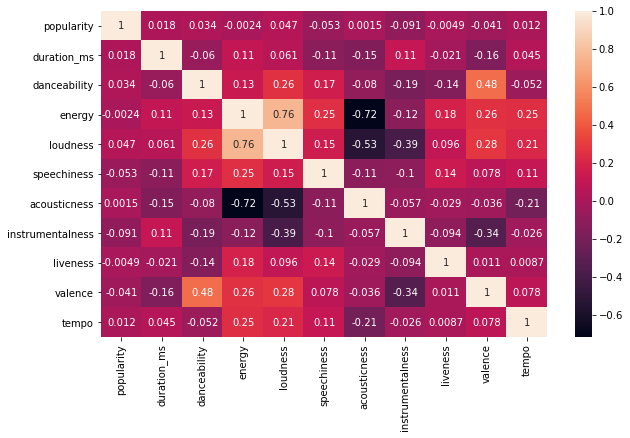

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(data[feature_continuous_numerical].corr(),annot=True)
plt.show()

**Encoding the categorical columns:**

In [46]:
feature_categorical = [feature for feature in data.columns if feature not in feature_numerical]

In [48]:
dataset=data.copy()
for feature in feature_categorical:
    print(feature,': {}, missing values {}'.format(data[feature].nunique(), data[feature].isna().sum()))

artists : 31437, missing values 0
album_name : 46589, missing values 0
track_name : 73608, missing values 0
track_genre : 114, missing values 0
speechiness_type : 3, missing values 0


The track genre can definitely affect the popularity as it would depend on the individual which genre they would like. The artist name can also affect the song's popularity as a famed artist is likely to have more popular tracks. track_name and album_name can also affect the popularity. Since there are large number of unique entries in each of these columns, we would use BaseN encoder.

speechiness_type can be converted with one-hot encoding (precisely dummy encoding). As number of feature in track_genre is high, so we can use BaseN encoding method.

In [50]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [51]:
import category_encoders as ce

In [52]:
encoder1 = ce.BaseNEncoder(cols=['track_genre','album_name','track_name','artists'], base=10, return_df=True)
data = encoder1.fit_transform(data)
data.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type
0,0,0,0,0,1,0,0,0,0,1,...,0.179444,0.063221,0.814285,0.715,87.917,4,0,0,1,Low
1,0,0,0,0,2,0,0,0,0,2,...,0.961249,0.088923,0.632214,0.267,77.489,4,0,0,1,Low
2,0,0,0,0,3,0,0,0,0,3,...,0.458258,0.000000,0.651084,0.120,76.332,4,0,0,1,Low
3,0,0,0,0,4,0,0,0,0,4,...,0.951315,0.147871,0.666983,0.143,181.740,3,0,0,1,Low
4,0,0,0,0,5,0,0,0,0,5,...,0.684836,0.000000,0.607730,0.167,119.949,4,0,0,1,Low


In [53]:
data=pd.get_dummies(data=data, columns=['speechiness_type'], drop_first=True)
print(data.shape)
data.head()

(113549, 35)


,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,0.063221,0.814285,0.715,87.917,4,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,0.088923,0.632214,0.267,77.489,4,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,0.000000,0.651084,0.120,76.332,4,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,0.147871,0.666983,0.143,181.740,3,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,0.000000,0.607730,0.167,119.949,4,0,0,1,1,0


**Feature scaling**

In [54]:
data['explicit'] = np.where(data['explicit']==False, 0,1)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaling = [feature for feature in feature_numerical if feature not in ['popularity','mode']]
scaler.fit(data[features_scaling])

StandardScaler()

In [58]:
scaler.transform(data[features_scaling])

array([[ 0.1853255 , -0.30593202,  0.62839367, ...,  0.92898358,
        -1.14299362,  0.22165951],
       [-0.92488754, -0.30593202, -0.84789057, ..., -0.79939532,
        -1.4909088 ,  0.22165951],
       [-0.053284  , -0.30593202, -0.74408933, ..., -1.36651965,
        -1.52951044,  0.22165951],
       ...,
       [ 0.62849465, -0.30593202,  0.35735711, ...,  1.03700726,
         0.34038354,  0.22165951],
       [ 0.75284102, -0.30593202,  0.11515423, ..., -0.23612898,
         0.4598918 ,  0.22165951],
       [ 0.31240644, -0.30593202, -0.23661663, ...,  0.90197766,
        -1.43389048,  0.22165951]])

In [61]:
data_to_replace =pd.DataFrame(scaler.transform(data[features_scaling]), columns = features_scaling)

In [62]:
data_to_replace.head()

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660
1,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660
2,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660
3,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538
4,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660


In [64]:
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values

In [65]:
data.isna().sum()

artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_type_Low       0
speechiness_ty

**Feature Selection**

**We would use correlation for feature selection**

First separate the dependent and independent feature

In [66]:
X=data.drop(['popularity'],axis=1)
y=data['popularity']

In [67]:
X.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


Now we would do train-test-split to prevent the overfitting

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=7)

In [69]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(79484, 34) (34065, 34)
(79484,) (34065,)


In [71]:
def correlation(dataset, threshold):
    correlated_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns

In [72]:
corr_features=correlation(X_train, 0.7)
print(len(set(corr_features)))
print(corr_features)

5
{'speechiness_type_Medium', 'loudness', 'acousticness', 'track_name_0', 'album_name_0'}


In [73]:
X_train_corr= X_train.copy()
X_test_corr= X_test.copy()

In [74]:
X_train_corr.drop(corr_features, axis=1, inplace = True)
X_test_corr.drop(corr_features, axis=1, inplace = True)
print(X_train_corr.shape, X_test_corr.shape)

(79484, 29) (34065, 29)


In [75]:
X_train_corr.isna().sum()

artists_0               0
artists_1               0
artists_2               0
artists_3               0
artists_4               0
album_name_1            0
album_name_2            0
album_name_3            0
album_name_4            0
track_name_1            0
track_name_2            0
track_name_3            0
track_name_4            0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
mode                    0
speechiness             0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre_0           0
track_genre_1           0
track_genre_2           0
speechiness_type_Low    0
dtype: int64

## Model Training

In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge

In [81]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
xgbreg=XGBRegressor()
xgbrfreg=XGBRFRegressor()
dtree=DecisionTreeRegressor()
bayridge=BayesianRidge()

In [82]:
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual = y_test-prediction
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)
    
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

In [83]:
import warnings
warnings.filterwarnings("ignore")

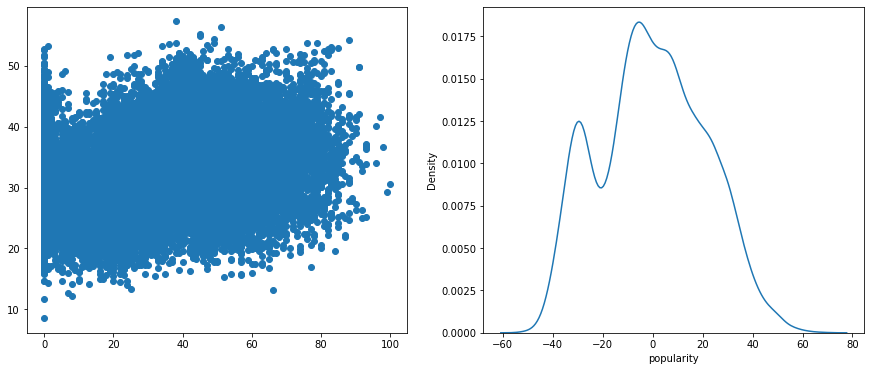

In [85]:
model(lr)

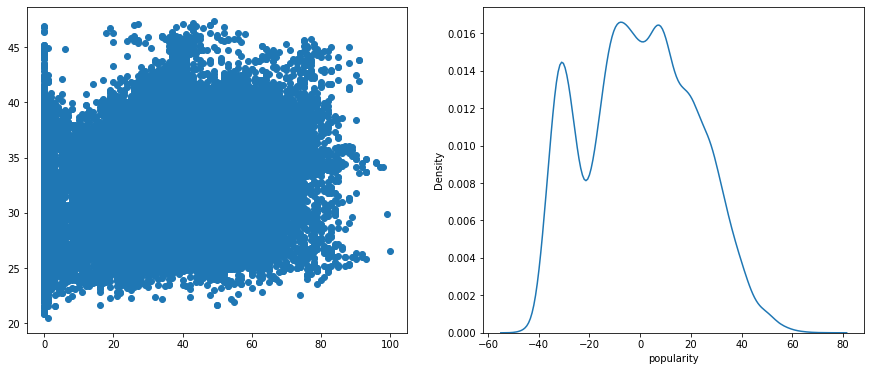

In [86]:
model(lasso)

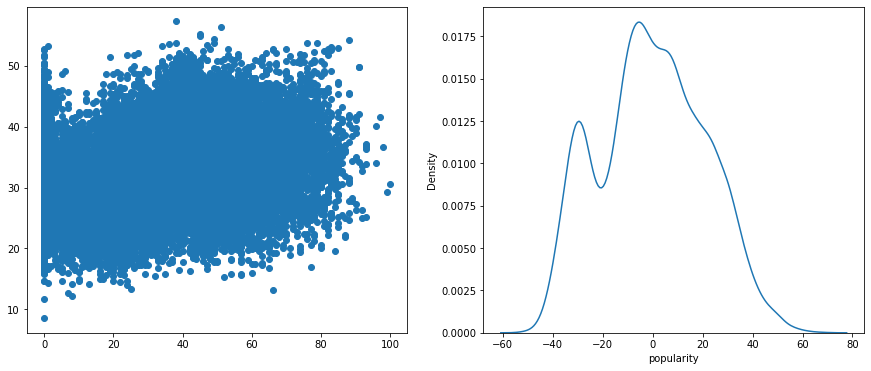

In [87]:
model(ridge)

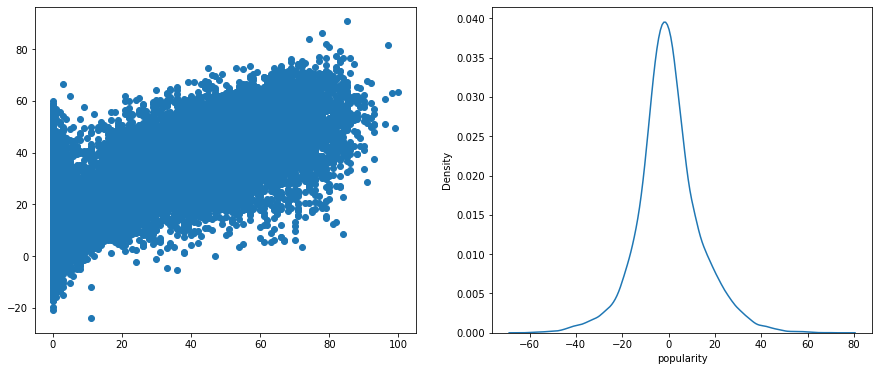

In [88]:
model(xgbreg)

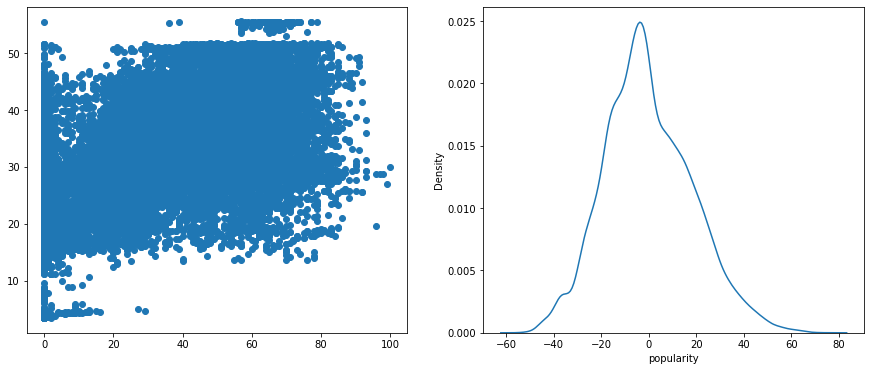

In [89]:
model(xgbrfreg)

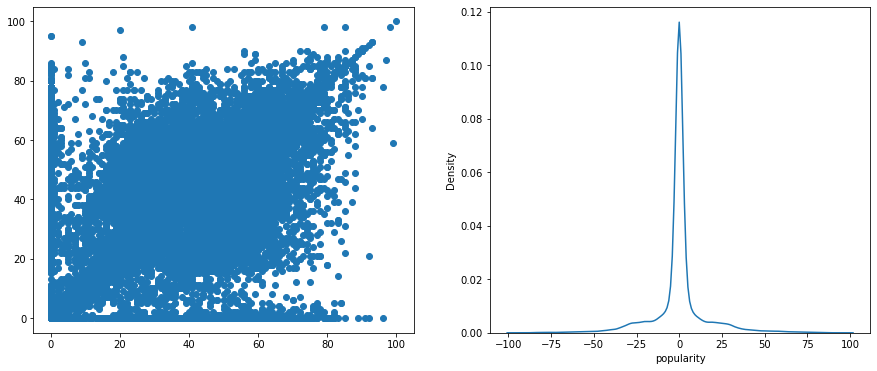

In [90]:
model(dtree)

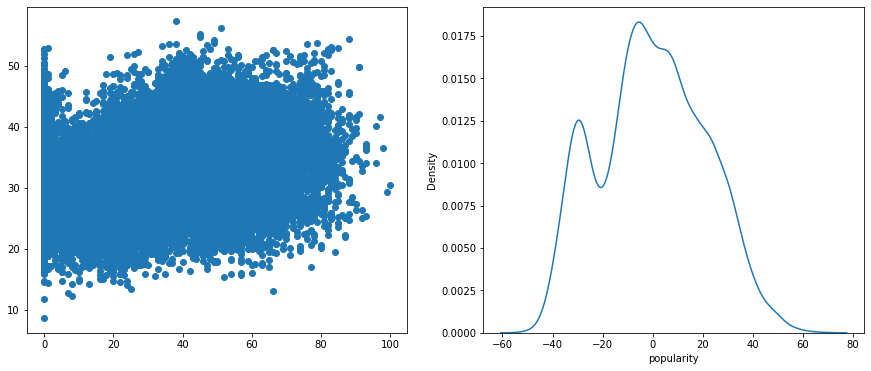

In [91]:
model(bayridge)

**Comments:**

1. Xgboost is giving the most promising result smong the models
2. Linear models do not perform well
3. Decision tree is also performing well

## Performance metrics

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [94]:
algos = [lr,lasso,ridge,xgbreg,xgbrfreg,dtree,bayridge]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test,prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)
    

In [95]:
algosname=['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'XGBoostRandomForest','DecisionTree','BayesianRidge']
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])

In [96]:
metrics

,Model,MSE,ABMSE,R2_score
0,Linear Regression,455.348812,17.556276,0.077834
1,Lasso,465.894997,17.976374,0.056476
2,Ridge,455.348820,17.556298,0.077834
3,XGBoost,186.876335,10.006477,0.621541
4,XGBoostRandomForest,343.394806,14.755475,0.304561
5,DecisionTree,236.651937,7.760296,0.520736
6,BayesianRidge,455.357794,17.561725,0.077815


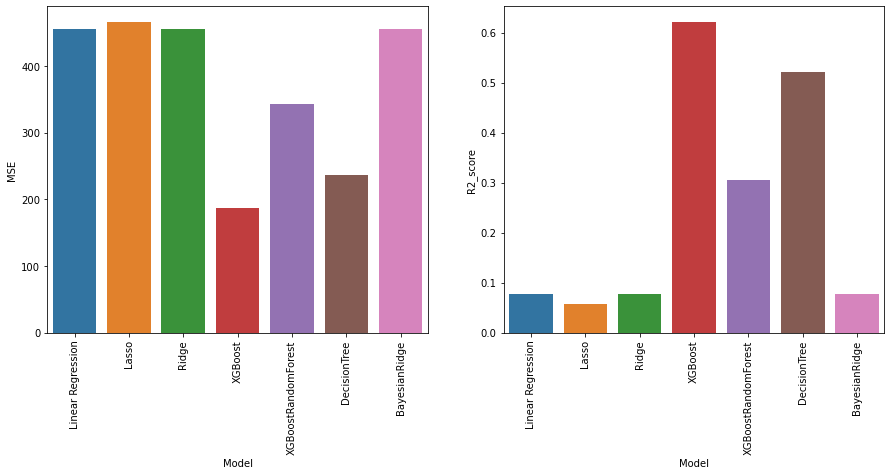

In [98]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()


**Comments:**

1. From the above performance metrics, we see that the XGBoost (Regressor) and Decission Tree performs much better than the rest of the models.
2. XGBoost has the highest r2_score and the least mean squared error among the models, 0.62 and 186.87 correspondingly.
3. We would use this XGBoost model for future predictions.

**Possible reason**  for the decission tree and xgboost model performing better than the linear models: It could be because the data itself is not linear. Hence, the tree based models are performing well. Both decission tree and XgBoost use tree based models for predictions rather than fitting a line or a curve to the data points.

Open to further comments/suggestions on why the tree models are performing better.